# Breast Cancer Diagnostic
## The goal of this project is to build a model able to predict the diagnosis of breast cancer tissues as malignant or benign. 

- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

- Class distribution: 357 benign, 212 malignant. More info about this dataset here

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (roc_auc_score, confusion_matrix, recall_score, precision_score, RocCurveDisplay, 
                             accuracy_score, plot_confusion_matrix, auc, classification_report)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import plotly.express as px

In [45]:
# import data
X= pd.read_csv("X.csv")
y=pd.read_csv("y.csv")
random=42

In [46]:
X.iloc[73]

radius_mean                 13.800000
texture_mean                15.790000
perimeter_mean              90.430000
area_mean                  584.100000
smoothness_mean              0.100700
compactness_mean             0.128000
concavity_mean               0.077890
concave points_mean          0.050690
symmetry_mean                0.166200
fractal_dimension_mean       0.065660
radius_se                    0.278700
texture_se                   0.620500
perimeter_se                 1.957000
area_se                     23.350000
smoothness_se                0.004717
compactness_se               0.020650
concavity_se                 0.017590
concave points_se            0.009206
symmetry_se                  0.012200
fractal_dimension_se         0.003130
radius_worst                16.570000
texture_worst               20.860000
perimeter_worst            110.300000
area_worst                 812.400000
smoothness_worst             0.141100
compactness_worst            0.354200
concavity_wo

In [47]:
X=X.drop(73)
X.shape

(568, 30)

In [48]:
y=y.drop(73)
y.shape

(568, 1)

In [49]:
y=y.values.ravel()

### ALL W/0 outlier

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random)

## Logistic Regression

In [51]:
lr= LogisticRegression(random_state=random, max_iter=5000)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Accuracy: ", lr.score(X_train, y_train))
print("Test Accuracy: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Accuracy:  0.9596977329974811
Test Accuracy:  0.9473684210526315
Training ROC_AUC:  0.9534200702678964
Test ROC_AUC:  0.9408008036739379


In [26]:
X_test.shape

(171, 30)

In [52]:
lr= LogisticRegression(random_state=random, max_iter=5000, penalty='l1', solver='liblinear')
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Accuracy: ", lr.score(X_train, y_train))
print("Test Accuracy: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Accuracy:  0.964735516372796
Test Accuracy:  0.9649122807017544
Training ROC_AUC:  0.9603645147123409
Test ROC_AUC:  0.9605338691159587


## Tuning

In [53]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import warnings 
warnings.filterwarnings("ignore")

# define models and parameters
# define grid search
param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
            'penalty':['l2'],
            'C':[100, 10, 1.0, 0.1, 0.01, 1000],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=1000, max_iter=5000, random_state=42, solver='newton-cg')


0.9961570207570207

In [54]:
# define models and parameters
# define grid search
param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
            'penalty':['l2'],
            'C':[900, 1000,2000,3000,3100],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=900, max_iter=5000, random_state=42, solver='newton-cg')


0.9962459096459095

In [55]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
0,0.185713,0.021669,0.002790,0.000644,900,5000,l2,newton-cg,"{'C': 900, 'max_iter': 5000, 'penalty': 'l2', ...",1.0,...,0.992000,1.000000,1.0,1.0,0.991429,0.994286,0.997143,0.996246,0.005190,1
3,0.219884,0.022818,0.003314,0.000619,1000,5000,l2,newton-cg,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l2',...",1.0,...,0.992000,1.000000,1.0,1.0,0.991429,0.994286,0.997143,0.996157,0.005372,2
6,0.260357,0.055546,0.003815,0.001157,2000,5000,l2,newton-cg,"{'C': 2000, 'max_iter': 5000, 'penalty': 'l2',...",1.0,...,0.992000,1.000000,1.0,1.0,0.985714,0.994286,0.997143,0.995507,0.006776,3
9,0.257805,0.036962,0.003343,0.000783,3000,5000,l2,newton-cg,"{'C': 3000, 'max_iter': 5000, 'penalty': 'l2',...",1.0,...,0.992000,0.997333,1.0,1.0,0.985714,0.997143,1.000000,0.995335,0.007404,4
12,0.432043,0.127546,0.005360,0.001844,3100,5000,l2,newton-cg,"{'C': 3100, 'max_iter': 5000, 'penalty': 'l2',...",1.0,...,0.992000,0.997333,1.0,1.0,0.985714,0.997143,1.000000,0.995244,0.007498,5
5,0.010208,0.002525,0.002675,0.000542,1000,5000,l2,liblinear,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l2',...",1.0,...,0.992000,1.000000,1.0,1.0,0.982857,0.988571,0.997143,0.995226,0.006346,6
4,1.573359,0.235743,0.003440,0.000911,1000,5000,l2,lbfgs,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l2',...",1.0,...,0.994667,1.000000,1.0,1.0,0.982857,0.994286,0.997143,0.994964,0.008017,7
7,1.621726,0.239602,0.003545,0.000758,2000,5000,l2,lbfgs,"{'C': 2000, 'max_iter': 5000, 'penalty': 'l2',...",1.0,...,0.994667,0.997333,1.0,1.0,0.988571,0.991429,0.997143,0.994778,0.007312,8
1,1.447463,0.170341,0.003443,0.000974,900,5000,l2,lbfgs,"{'C': 900, 'max_iter': 5000, 'penalty': 'l2', ...",1.0,...,0.994667,0.997333,1.0,1.0,0.982857,0.991429,0.997143,0.994596,0.008018,9
13,1.922603,0.520707,0.004369,0.001576,3100,5000,l2,lbfgs,"{'C': 3100, 'max_iter': 5000, 'penalty': 'l2',...",1.0,...,0.994667,0.994667,1.0,1.0,0.982857,0.991429,1.000000,0.994425,0.009161,10


##### Tuned Model

In [56]:
lr= LogisticRegression(C=900, max_iter=5000, random_state=42, solver='newton-cg')
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9949622166246851
0.9824561403508771
Training ROC_AUC:  0.9945514931927976
Test ROC_AUC:  0.9829219288174511


Accuracy : 98.25
precision : 97.06
recall : 98.51


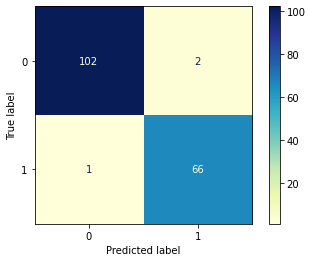

In [57]:
print('Accuracy :', round(accuracy_score(y_test,y_test_pred)*100,2))
print('precision :', round(precision_score(y_test,y_test_pred)*100,2))
print('recall :', round(recall_score(y_test,y_test_pred)*100,2))
plot_confusion_matrix(lr, X_test, y_test, cmap='YlGnBu')
plt.show()

In [58]:
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.99      0.98      0.99       104
   Malignant       0.97      0.99      0.98        67

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Text(0.5, 0, 'False Positive Rate')

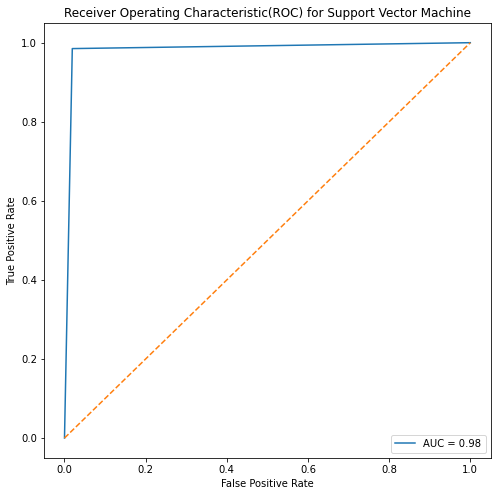

In [60]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

In [127]:
lr= LogisticRegression(C=2000, solver='liblinear', random_state=random)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Score: ",lr.score(X_train, y_train))
print("Test Score: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Score:  0.9773869346733668
Test Score:  0.9766081871345029
Training ROC_AUC:  0.9738416754265383
Test ROC_AUC:  0.974867724867725


### LASSO Tuning

In [61]:
# define models and parameters
# define grid search
param_grid={'solver': ['liblinear'], 
            'penalty':['l1'],
            'C':[100, 10, 1.0, 0.1, 0.01, 1000],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=10, max_iter=5000, penalty='l1', random_state=42,
                   solver='liblinear')


0.9957934065934066

In [62]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
1,0.281150,0.148662,0.004911,0.001402,10,5000,l1,liblinear,"{'C': 10, 'max_iter': 5000, 'penalty': 'l1', '...",1.0,...,0.992000,0.994667,1.000000,1.000000,0.988571,0.991429,0.997143,0.995793,0.004622,1
0,0.637504,0.349293,0.003915,0.001397,100,5000,l1,liblinear,"{'C': 100, 'max_iter': 5000, 'penalty': 'l1', ...",1.0,...,0.992000,0.997333,1.000000,1.000000,0.974286,0.994286,0.997143,0.993410,0.009844,2
5,0.366201,0.165941,0.004043,0.000867,1000,5000,l1,liblinear,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l1',...",1.0,...,0.994667,0.997333,1.000000,1.000000,0.940000,0.994286,0.997143,0.990459,0.016518,3
2,0.224015,0.069415,0.004100,0.001088,1,5000,l1,liblinear,"{'C': 1.0, 'max_iter': 5000, 'penalty': 'l1', ...",1.0,...,0.994667,0.997333,0.994667,0.997333,0.965714,0.988571,0.994286,0.990302,0.013078,4
3,0.090257,0.014776,0.003658,0.000651,0.1,5000,l1,liblinear,"{'C': 0.1, 'max_iter': 5000, 'penalty': 'l1', ...",1.0,...,0.992000,1.000000,0.960000,0.997333,0.960000,0.991429,0.997143,0.978775,0.025207,5
4,0.009737,0.001093,0.003044,0.000448,0.01,5000,l1,liblinear,"{'C': 0.01, 'max_iter': 5000, 'penalty': 'l1',...",1.0,...,0.997333,0.976000,0.954667,1.000000,0.917143,0.988571,0.980000,0.967975,0.038450,6


##### Tuned Model

In [63]:
lr= LogisticRegression(penalty='l1', C=10, solver='liblinear', random_state=random)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Score: ",lr.score(X_train, y_train))
print("Test Score: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Score:  0.9848866498740554
Test Score:  0.9707602339181286
Training ROC_AUC:  0.9821585419411507
Test ROC_AUC:  0.9679965556831229


Accuracy : 97.08
precision : 96.97
recall : 95.52


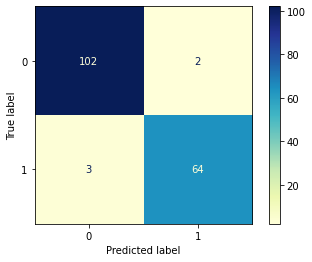

In [64]:
print('Accuracy :', round(accuracy_score(y_test,y_test_pred)*100,2))
print('precision :', round(precision_score(y_test,y_test_pred)*100,2))
print('recall :', round(recall_score(y_test,y_test_pred)*100,2))
plot_confusion_matrix(lr, X_test, y_test, cmap='YlGnBu')
plt.show()

In [248]:
# last 5 are what was predicted incorrectly
residuals = lr.predict_proba(X_test)[:,1] - y_test
sortIdx=np.argsort(np.abs(residuals))
residDF=X_test.iloc[sortIdx].copy()
residDF["resid"]=residuals[sortIdx]
residDF['y_true']=y_test[sortIdx]
residDF['y_pred']=y_test_pred[sortIdx]
# print(residDF.std())
outliers=residDF.tail(15)
outliers
# outliers.std()
#sns.regplot(x = residuals, y = y_test_pred, scatter = True, color = 'red');

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,resid,y_true,y_pred
208,13.110,22.54,87.02,529.4,0.10020,0.14830,0.08705,0.05102,0.1850,0.07310,...,639.3,0.13490,0.4402,0.3162,0.11260,0.4128,0.10760,0.062576,0,0
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,455.7,0.14990,0.1398,0.1125,0.06136,0.3409,0.08147,0.070739,0,0
228,12.620,23.97,81.35,496.4,0.07903,0.07529,0.05438,0.02036,0.1514,0.06019,...,624.0,0.12270,0.3454,0.3911,0.11800,0.2826,0.09585,0.139999,0,0
526,13.460,18.75,87.44,551.1,0.10750,0.11380,0.04201,0.03152,0.1723,0.06317,...,719.8,0.16240,0.3124,0.2654,0.14270,0.3518,0.08665,0.156236,0,0
396,13.510,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.05381,0.1806,0.06079,...,675.2,0.14280,0.2570,0.3438,0.14530,0.2666,0.07686,0.159201,0,0
184,15.280,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,973.1,0.13010,0.3299,0.3630,0.12260,0.3175,0.09772,-0.166375,1,1
255,13.960,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,0.06130,...,826.0,0.15120,0.3262,0.3209,0.13740,0.3068,0.07957,-0.211751,1,1
86,14.480,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,0.2075,0.05636,...,808.9,0.13060,0.1976,0.3349,0.12250,0.3020,0.06846,-0.222202,1,1
89,14.640,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,0.06346,...,803.6,0.12770,0.3089,0.2604,0.13970,0.3151,0.08473,0.222614,0,0
204,12.470,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,677.9,0.14260,0.2378,0.2671,0.10150,0.3014,0.08750,0.282309,0,0


In [155]:
residDF.groupby('y_true').mean()

,radius_worst,concave points_worst,texture_worst,texture_mean,smoothness_worst,compactness_worst,area_worst,area_se,concavity_mean,smoothness_mean,concave points_mean,compactness_se,compactness_mean,concavity_se,symmetry_worst,concavity_worst,symmetry_mean,resid,y_pred
y_true,,,,,,,,,,,,,,,,,,,
0,13.188380,0.073641,23.808611,18.094167,0.125902,0.183516,541.462963,20.851676,0.045052,0.093203,0.025749,0.021112,0.079677,0.024923,0.276775,0.166156,0.176876,0.034390,0.018519
1,21.436032,0.189681,29.965079,22.163333,0.147222,0.408268,1453.939683,72.096508,0.168397,0.104290,0.091669,0.033734,0.153177,0.041532,0.324095,0.477278,0.193902,-0.037147,0.952381


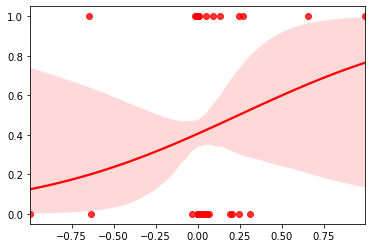

In [212]:
sns.regplot(x = residuals, y = y_test_pred, logistic=True, scatter = True, color = 'red');

In [ ]:
sns.residplot(x=resid, y=y, lowess=True, color="g")

## Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB
#normal data helped this
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_train_pred=gnb.predict(X_train)
y_test_pred=gnb.predict(X_test)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9445843828715366
0.9415204678362573
Training ROC_AUC:  0.934082674571805
Test ROC_AUC:  0.9386481056257175


#### Bernoulli

In [67]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.6372795969773299
0.6081871345029239
Training ROC_AUC:  0.5
Test ROC_AUC:  0.5


### Tuning

In [68]:
param_grid= {'var_smoothing': np.logspace(0,-9, num=100)
        }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(gnb, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

GaussianNB(var_smoothing=6.579332246575682e-09)


0.989829304029304

var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean. In this case, np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples.
from https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba

In [69]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
90,0.003117,0.001072,0.002656,0.000776,6.57933e-09,{'var_smoothing': 6.579332246575682e-09},1.0,0.989011,0.997253,0.997333,...,0.997333,0.986667,0.989333,1.000000,0.991429,0.971429,1.0,0.989829,0.008755,1
89,0.002634,0.000618,0.002507,0.000645,8.11131e-09,{'var_smoothing': 8.111308307896856e-09},1.0,0.989011,0.997253,0.994667,...,0.997333,0.986667,0.986667,1.000000,0.991429,0.971429,1.0,0.989649,0.008657,2
91,0.004498,0.001309,0.004436,0.001377,5.3367e-09,{'var_smoothing': 5.336699231206302e-09},1.0,0.991758,0.997253,0.997333,...,0.997333,0.984000,0.992000,1.000000,0.991429,0.971429,1.0,0.989648,0.008987,3
87,0.002546,0.000574,0.002680,0.000562,1.23285e-08,{'var_smoothing': 1.232846739442066e-08},1.0,0.989011,1.000000,0.994667,...,0.994667,0.984000,0.984000,1.000000,0.994286,0.974286,1.0,0.989569,0.008458,4
88,0.002975,0.000917,0.002645,0.000884,1e-08,{'var_smoothing': 1e-08},1.0,0.989011,1.000000,0.994667,...,0.994667,0.986667,0.986667,1.000000,0.991429,0.971429,1.0,0.989372,0.008865,5
92,0.002742,0.000763,0.002640,0.000609,4.32876e-09,{'var_smoothing': 4.328761281083061e-09},1.0,0.991758,0.997253,0.997333,...,0.997333,0.984000,0.994667,0.997333,0.991429,0.971429,1.0,0.989371,0.009262,6
93,0.002927,0.000595,0.002448,0.000681,3.51119e-09,{'var_smoothing': 3.5111917342151273e-09},1.0,0.991758,0.997253,0.997333,...,0.997333,0.984000,0.994667,0.997333,0.991429,0.965714,1.0,0.989183,0.009674,7
85,0.002895,0.000425,0.003145,0.000506,1.87382e-08,{'var_smoothing': 1.873817422860383e-08},1.0,0.986264,1.000000,0.994667,...,0.992000,0.981333,0.984000,1.000000,0.994286,0.974286,1.0,0.989100,0.009019,8
86,0.003108,0.000795,0.002963,0.000770,1.51991e-08,{'var_smoothing': 1.519911082952933e-08},1.0,0.986264,1.000000,0.994667,...,0.992000,0.981333,0.984000,1.000000,0.994286,0.974286,1.0,0.988916,0.008997,9
84,0.002901,0.000801,0.003132,0.001056,2.31013e-08,{'var_smoothing': 2.310129700083158e-08},1.0,0.986264,1.000000,0.994667,...,0.992000,0.978667,0.984000,1.000000,0.997143,0.974286,1.0,0.988834,0.009115,10


##### Tuned Model

In [70]:
gnb = GaussianNB(var_smoothing=6.579332246575682e-09)
gnb = gnb.fit(X_train, y_train)
y_train_pred=gnb.predict(X_train)
y_test_pred=gnb.predict(X_test)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))
print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9395465994962217
0.935672514619883
Training RMSE:  0.24587273233072907
Test RMSE:  0.25362863675089403
Training ROC_AUC:  0.9256422924901186
Test ROC_AUC:  0.9285304247990815


Text(0.5, 0, 'False Positive Rate')

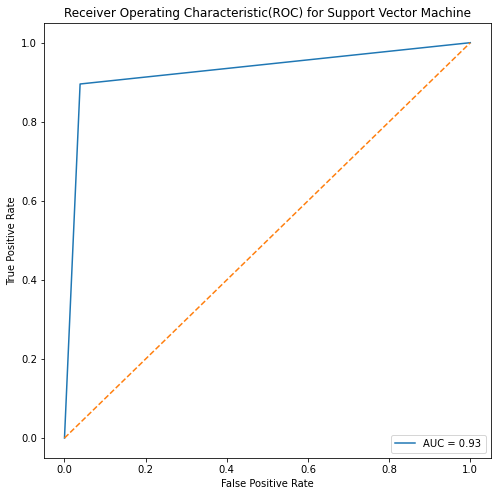

In [71]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
#KNN is more sensititve to noise
transformer = RobustScaler().fit(X)
X_scaled=transformer.transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random)
#scaling didn't help*****************************
knn=KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9395465994962217
0.9239766081871345
Training ROC_AUC:  0.9316260430390865
Test ROC_AUC:  0.9189150401836969


### Tuning

In [73]:
param_grid= {'n_neighbors': np.arange(1,40),
            'p':[1,2]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(knn, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

KNeighborsClassifier(n_neighbors=15, p=1)


0.9784484737484738

In [74]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
28,0.002923,0.000637,0.003827,0.001103,15,1,"{'n_neighbors': 15, 'p': 1}",1.0,0.978022,0.995879,...,0.993333,0.992000,0.940000,1.0,0.980000,0.952857,0.990000,0.978448,0.018603,1
30,0.002954,0.000727,0.003442,0.000680,16,1,"{'n_neighbors': 16, 'p': 1}",1.0,0.975275,0.998626,...,0.994667,0.986667,0.938667,1.0,0.978571,0.952857,0.990000,0.977903,0.018820,2
32,0.002621,0.000635,0.003572,0.000736,17,1,"{'n_neighbors': 17, 'p': 1}",1.0,0.973901,0.998626,...,0.994667,0.990667,0.937333,1.0,0.981429,0.952857,0.988571,0.977722,0.018922,3
34,0.003023,0.000680,0.003549,0.000732,18,1,"{'n_neighbors': 18, 'p': 1}",1.0,0.973901,0.998626,...,0.996000,0.988000,0.936000,1.0,0.982857,0.952857,0.988571,0.977643,0.019199,4
26,0.002850,0.000624,0.003267,0.000526,14,1,"{'n_neighbors': 14, 'p': 1}",1.0,0.980769,0.995879,...,0.994667,0.990667,0.942667,1.0,0.981429,0.952857,0.988571,0.977275,0.021053,5
46,0.003748,0.001177,0.004358,0.001152,24,1,"{'n_neighbors': 24, 'p': 1}",1.0,0.972527,0.995879,...,0.992000,0.977333,0.956000,1.0,0.985714,0.951429,0.985714,0.977103,0.018462,6
36,0.003011,0.000669,0.003867,0.000805,19,1,"{'n_neighbors': 19, 'p': 1}",1.0,0.969780,0.997253,...,0.994667,0.984000,0.930667,1.0,0.984286,0.952857,0.988571,0.976978,0.019867,7
42,0.003432,0.000538,0.004272,0.000724,22,1,"{'n_neighbors': 22, 'p': 1}",1.0,0.972527,0.994505,...,0.992000,0.976000,0.961333,1.0,0.985714,0.951429,0.987143,0.976919,0.018773,8
22,0.003362,0.000816,0.004013,0.000905,12,1,"{'n_neighbors': 12, 'p': 1}",1.0,0.980769,0.997253,...,0.993333,0.990667,0.946667,1.0,0.985714,0.955714,0.990000,0.976836,0.021696,9
40,0.003063,0.000872,0.003989,0.000918,21,1,"{'n_neighbors': 21, 'p': 1}",1.0,0.971154,0.995879,...,0.992000,0.977333,0.961333,1.0,0.985714,0.952857,0.988571,0.976818,0.018729,10


##### Tuned Model

In [75]:
knn=KNeighborsClassifier(n_neighbors=15, p=1)
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))


0.9395465994962217
0.935672514619883
Training ROC_AUC:  0.9256422924901186
Test ROC_AUC:  0.9258754305396097


In [76]:
knn=KNeighborsClassifier(n_neighbors=24, p=1)
knn.fit(X_train, y_train)
y_train_prediction=knn.predict(X_train)
y_prediction=knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.929471032745592
0.9298245614035088
Training ROC_AUC:  0.9256422924901186
Test ROC_AUC:  0.9258754305396097


Text(0.5, 0, 'False Positive Rate')

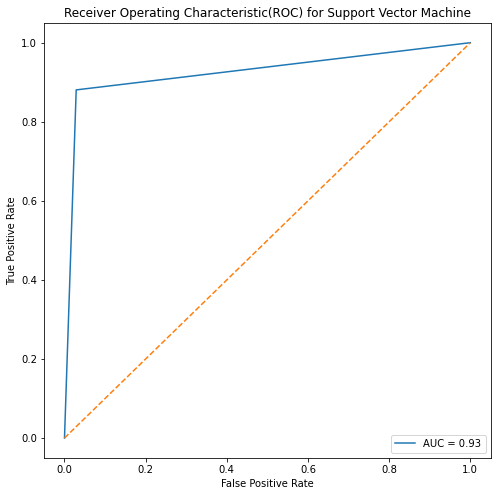

In [77]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## SVM

In [78]:
#SVM
from sklearn.svm import SVC
clf = SVC()
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9219143576826196
0.9181286549707602
Training ROC_AUC:  0.899840799297321
Test ROC_AUC:  0.9034873708381171


In [226]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Tuning

In [79]:
param_grid= {'kernel' : ['poly', 'rbf', 'sigmoid'],
             'C' : [50, 10, 1.0, 0.1, 0.01],
             'gamma' : ['scale']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

SVC(C=50)


0.9790217338217339

In [80]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
1,0.004480,0.000902,0.003135,0.000952,50,scale,rbf,"{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}",1.0,0.961538,...,0.997333,0.989333,0.968000,1.000000,0.925714,0.988571,0.991429,0.979022,0.026654,1
4,0.004694,0.000743,0.003647,0.000660,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",1.0,0.961538,...,0.994667,0.989333,0.957333,1.000000,0.925714,0.985714,0.985714,0.976991,0.027191,2
0,0.005795,0.001369,0.003538,0.000711,50,scale,poly,"{'C': 50, 'gamma': 'scale', 'kernel': 'poly'}",1.0,0.958791,...,0.997333,0.984000,0.949333,1.000000,0.945714,0.982857,0.994286,0.976101,0.027367,3
3,0.005269,0.001190,0.003522,0.000776,10,scale,poly,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}",1.0,0.956044,...,0.994667,0.984000,0.946667,1.000000,0.957143,0.977143,0.991429,0.975272,0.027105,4
7,0.005808,0.001282,0.004038,0.000953,1,scale,rbf,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}",1.0,0.958791,...,0.986667,0.965333,0.922667,1.000000,0.988571,0.977143,0.988571,0.971984,0.024942,5
6,0.004235,0.000755,0.003213,0.000629,1,scale,poly,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}",1.0,0.956044,...,0.986667,0.962667,0.917333,1.000000,0.991429,0.977143,0.988571,0.968979,0.027971,6
10,0.006120,0.001142,0.003678,0.000848,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",1.0,0.958791,...,0.978667,0.954667,0.912000,0.994667,0.994286,0.971429,0.980000,0.965306,0.027744,7
13,0.008696,0.001434,0.004499,0.001151,0.01,scale,rbf,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}",1.0,0.958791,...,0.978667,0.954667,0.912000,0.994667,0.997143,0.971429,0.980000,0.964480,0.028352,8
9,0.003947,0.000578,0.002888,0.000614,0.1,scale,poly,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}",1.0,0.958791,...,0.978667,0.954667,0.912000,0.994667,0.994286,0.971429,0.980000,0.964115,0.028832,9
12,0.005942,0.001679,0.003754,0.001056,0.01,scale,poly,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}",1.0,0.958791,...,0.978667,0.952000,0.909333,0.994667,0.997143,0.971429,0.980000,0.963379,0.029409,10


##### Tuned Model

In [81]:
clf = SVC(C=50, kernel='poly')
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9219143576826196
0.9415204678362573
Training ROC_AUC:  0.902832674571805
Test ROC_AUC:  0.9306831228473019


In [82]:
clf = SVC(C=10, kernel='poly')
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9193954659949622
0.9298245614035088
Training ROC_AUC:  0.8993604523495827
Test ROC_AUC:  0.9157577497129735


## Decision trees

In [84]:
# Decision trees
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9239766081871345
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9189150401836969


### Tuning

In [85]:
maxDepth=clf.tree_.max_depth
param_grid = {'max_depth':range(1, maxDepth+1),
              'max_features':[0.2,0.4,0.6,0.8], 
              'max_leaf_nodes':[20,30,40,50],
             'min_samples_leaf': [1,2,5,10]}
clf = tree.DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
grid_search.best_score_

{'max_depth': 4, 'max_features': 0.4, 'max_leaf_nodes': 20, 'min_samples_leaf': 10}


0.9725493284493285

In [86]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
211,0.003734,0.000727,0.002734,0.000574,4,0.4,20,10,"{'max_depth': 4, 'max_features': 0.4, 'max_lea...",0.994505,...,1.000000,0.921333,0.960000,0.988000,0.958571,0.947143,0.987143,0.972549,0.020939,1
467,0.006040,0.001183,0.004764,0.001091,8,0.4,20,10,"{'max_depth': 8, 'max_features': 0.4, 'max_lea...",1.000000,...,0.997333,0.892000,1.000000,1.000000,0.960000,0.954286,0.997143,0.971832,0.024988,2
259,0.002535,0.000535,0.002277,0.000441,5,0.2,20,10,"{'max_depth': 5, 'max_features': 0.2, 'max_lea...",1.000000,...,0.993333,0.933333,0.945333,0.961333,0.938571,0.962857,0.971429,0.970893,0.020734,3
219,0.004138,0.000990,0.003146,0.001030,4,0.4,40,10,"{'max_depth': 4, 'max_features': 0.4, 'max_lea...",0.995879,...,0.962667,0.953333,0.961333,0.972000,0.997143,0.961429,0.995714,0.970725,0.022181,4
207,0.003241,0.000769,0.002561,0.000644,4,0.2,50,10,"{'max_depth': 4, 'max_features': 0.2, 'max_lea...",1.000000,...,0.953333,0.920000,0.958667,1.000000,0.974286,0.952857,0.978571,0.970368,0.023280,5
275,0.004472,0.000917,0.003335,0.000731,5,0.4,20,10,"{'max_depth': 5, 'max_features': 0.4, 'max_lea...",0.997253,...,0.990667,0.913333,0.986667,0.970667,0.958571,0.958571,0.984286,0.968980,0.023565,6
463,0.003225,0.000672,0.002834,0.000583,8,0.2,50,10,"{'max_depth': 8, 'max_features': 0.2, 'max_lea...",0.997253,...,0.960000,0.913333,0.993333,0.994667,0.991429,0.957143,0.968571,0.968900,0.026810,7
411,0.003351,0.000577,0.002447,0.000602,7,0.4,40,10,"{'max_depth': 7, 'max_features': 0.4, 'max_lea...",0.960165,...,0.981333,0.970667,0.958667,0.973333,0.960000,0.937143,1.000000,0.968853,0.024323,8
375,0.004308,0.000544,0.002250,0.000405,6,0.8,30,10,"{'max_depth': 6, 'max_features': 0.8, 'max_lea...",1.000000,...,0.982667,0.924000,0.938667,0.996000,0.955714,0.960000,0.987143,0.968349,0.027708,9
287,0.003935,0.000735,0.003105,0.000439,5,0.4,50,10,"{'max_depth': 5, 'max_features': 0.4, 'max_lea...",0.990385,...,0.989333,0.901333,0.952000,1.000000,0.978571,0.922857,1.000000,0.968284,0.025095,10


##### Tuned Model

In [87]:
clf=tree.DecisionTreeClassifier(max_depth= 4, max_features= 0.4, max_leaf_nodes= 20, min_samples_leaf= 10)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.964735516372796
0.9298245614035088
Training ROC_AUC:  0.9603645147123409
Test ROC_AUC:  0.926377726750861


## Random Forest

In [101]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9883040935672515
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9877296211251435


### Tuning

In [102]:
param_grid = {'max_depth':np.arange(4, 10),
              'max_features':[0.2,0.4,0.6,0.8],
              'n_estimators': [10,50,100,200,300,500,1000]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf_rf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

RandomForestClassifier(max_depth=4, max_features=0.2, n_estimators=300,
                       random_state=42)


0.990981684981685

In [103]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
4,0.515543,0.038300,0.027983,0.002459,4,0.2,300,"{'max_depth': 4, 'max_features': 0.2, 'n_estim...",1.0,0.994505,...,0.994667,0.976000,1.0,1.0,0.980000,0.965714,1.0,0.990982,0.010100,1
6,1.918359,0.176380,0.100193,0.040808,4,0.2,1000,"{'max_depth': 4, 'max_features': 0.2, 'n_estim...",1.0,0.991758,...,0.994667,0.978667,1.0,1.0,0.980000,0.962857,1.0,0.990973,0.010506,2
33,0.999951,0.067045,0.048745,0.005475,5,0.2,500,"{'max_depth': 5, 'max_features': 0.2, 'n_estim...",1.0,0.997253,...,0.994667,0.976000,1.0,1.0,0.980000,0.962857,1.0,0.990908,0.011255,3
34,2.096852,0.150528,0.100895,0.016425,5,0.2,1000,"{'max_depth': 5, 'max_features': 0.2, 'n_estim...",1.0,0.994505,...,0.994667,0.978667,1.0,1.0,0.977143,0.962857,1.0,0.990893,0.010866,4
5,0.929059,0.114621,0.045863,0.003433,4,0.2,500,"{'max_depth': 4, 'max_features': 0.2, 'n_estim...",1.0,0.991758,...,0.994667,0.978667,1.0,1.0,0.980000,0.962857,1.0,0.990890,0.010595,5
43,0.142483,0.015397,0.008225,0.001881,5,0.6,50,"{'max_depth': 5, 'max_features': 0.6, 'n_estim...",1.0,0.994505,...,0.989333,0.976000,1.0,1.0,0.974286,0.967143,1.0,0.990883,0.010291,6
144,0.636640,0.051840,0.032469,0.003815,9,0.2,300,"{'max_depth': 9, 'max_features': 0.2, 'n_estim...",1.0,0.993132,...,0.994667,0.974667,1.0,1.0,0.982857,0.960000,1.0,0.990860,0.011520,7
44,0.276279,0.017856,0.012771,0.002664,5,0.6,100,"{'max_depth': 5, 'max_features': 0.6, 'n_estim...",1.0,0.994505,...,0.989333,0.973333,1.0,1.0,0.977143,0.967143,1.0,0.990829,0.010431,8
116,0.643122,0.043940,0.033641,0.005242,8,0.2,300,"{'max_depth': 8, 'max_features': 0.2, 'n_estim...",1.0,0.995879,...,0.994667,0.970667,1.0,1.0,0.982857,0.960000,1.0,0.990818,0.011757,9
31,0.382160,0.023863,0.021310,0.002965,5,0.2,200,"{'max_depth': 5, 'max_features': 0.2, 'n_estim...",1.0,1.000000,...,0.994667,0.976000,1.0,1.0,0.980000,0.962857,1.0,0.990809,0.011302,10


##### Tuned Model

In [104]:
#Random Forest
clf_rf = RandomForestClassifier(max_depth=4, max_features=0.2, n_estimators=300,random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9924433249370277
0.9707602339181286
Training ROC_AUC:  0.9895833333333333
Test ROC_AUC:  0.9679965556831229


In [105]:
#Random Forest
clf_rf = RandomForestClassifier(max_depth=9, max_features=0.2, n_estimators=300,random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))


print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9824561403508771
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9829219288174511


## Stochastic Gradient D

In [89]:
#SGD
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=5000, random_state=random)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9219143576826196
0.9239766081871345
Training ROC_AUC:  0.910312362758015
Test ROC_AUC:  0.913605051664753


In [90]:
param_grid = {'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty' : ['l2', 'l1', 'elasticnet'],
              'random_state':[random]
              }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

SGDClassifier(max_iter=5000, penalty='l1', random_state=42)


0.9629428571428572

In [91]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_penalty,param_random_state,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
1,0.004310,0.000656,0.002331,0.000671,hinge,l1,42,"{'loss': 'hinge', 'penalty': 'l1', 'random_sta...",0.994505,0.958791,...,0.997333,0.984000,0.949333,1.0,0.891429,0.982857,0.948571,0.962943,0.039713,1
13,0.004276,0.001026,0.002522,0.000590,perceptron,l1,42,"{'loss': 'perceptron', 'penalty': 'l1', 'rando...",0.994505,0.958791,...,0.997333,0.984000,0.949333,1.0,0.891429,0.982857,0.948571,0.962943,0.039713,1
10,0.004706,0.000970,0.002913,0.000980,squared_hinge,l1,42,"{'loss': 'squared_hinge', 'penalty': 'l1', 'ra...",0.989011,0.958791,...,1.000000,0.962667,0.946667,1.0,0.900000,0.982857,0.951429,0.962672,0.041187,3
9,0.004279,0.001096,0.002861,0.000805,squared_hinge,l2,42,"{'loss': 'squared_hinge', 'penalty': 'l2', 'ra...",0.997253,0.942308,...,0.997333,0.984000,0.877333,1.0,0.837143,0.980000,0.982857,0.962221,0.045157,4
4,0.005617,0.001389,0.002918,0.000867,log,l1,42,"{'loss': 'log', 'penalty': 'l1', 'random_state...",0.989011,0.958791,...,1.000000,0.976000,0.946667,1.0,0.902857,0.980000,0.968571,0.961288,0.044321,5
7,0.004948,0.001207,0.002574,0.000564,modified_huber,l1,42,"{'loss': 'modified_huber', 'penalty': 'l1', 'r...",0.989011,0.958791,...,1.000000,0.976000,0.946667,1.0,0.902857,0.980000,0.968571,0.961288,0.044321,5
2,0.004857,0.000947,0.002393,0.000650,hinge,elasticnet,42,"{'loss': 'hinge', 'penalty': 'elasticnet', 'ra...",0.991758,0.958791,...,0.997333,0.965333,0.930667,1.0,0.908571,0.982857,0.982857,0.958786,0.052224,7
14,0.005226,0.001070,0.002737,0.000853,perceptron,elasticnet,42,"{'loss': 'perceptron', 'penalty': 'elasticnet'...",0.991758,0.958791,...,0.997333,0.965333,0.930667,1.0,0.908571,0.982857,0.982857,0.958786,0.052224,7
11,0.004798,0.000808,0.002477,0.000567,squared_hinge,elasticnet,42,"{'loss': 'squared_hinge', 'penalty': 'elasticn...",0.997253,0.947802,...,0.994667,0.973333,0.949333,1.0,0.951429,0.980000,0.934286,0.957088,0.050843,9
6,0.005339,0.001065,0.003599,0.000836,modified_huber,l2,42,"{'loss': 'modified_huber', 'penalty': 'l2', 'r...",0.997253,0.961538,...,0.997333,0.954667,0.944000,1.0,0.928571,0.977143,0.957143,0.955176,0.056337,10


##### Tuned Model

In [92]:
clf = SGDClassifier(loss='hinge', max_iter=5000, penalty='l1', random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9042821158690176
0.8771929824561403
Training ROC_AUC:  0.9039580588493632
Test ROC_AUC:  0.8804535017221584


In [95]:
clf = SGDClassifier(loss='modified_huber', max_iter=100, penalty='l2', random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9193954659949622
0.9239766081871345
Training ROC_AUC:  0.9068401405357928
Test ROC_AUC:  0.913605051664753


## Stochastic Gradient Boosting

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9707602339181286
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9706515499425947


### Tuning

In [97]:
param_grid = {'n_estimators' : [10, 100, 1000],
              'learning_rate' : [0.001, 0.01, 0.1],
              'subsample' : [0.5, 0.7, 1.0],
              'max_depth' : [3, 7, 9]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

GradientBoostingClassifier(n_estimators=1000, subsample=0.7)


0.9948046398046398

In [98]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
61,2.607754,0.320029,0.004569,0.001301,0.1,3,1000,0.7,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.0,...,0.994667,0.981333,1.000000,1.0,0.977143,0.977143,1.0,0.994805,0.007542,1
60,1.772621,0.112845,0.004065,0.000786,0.1,3,1000,0.5,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.0,...,0.997333,0.984000,1.000000,1.0,0.977143,0.980000,1.0,0.994595,0.007631,2
62,3.153673,0.269132,0.004367,0.000780,0.1,3,1000,1,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.0,...,0.994667,0.984000,1.000000,1.0,0.982857,0.982857,1.0,0.993990,0.006631,3
33,2.017029,0.119282,0.004525,0.000692,0.01,3,1000,0.5,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",1.0,...,0.992000,0.984000,0.997333,1.0,0.980000,0.980000,1.0,0.993776,0.007333,4
70,5.193260,0.456796,0.005833,0.001100,0.1,7,1000,0.7,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",1.0,...,0.986667,0.986667,1.000000,1.0,0.988571,0.974286,1.0,0.993491,0.007821,5
34,2.723320,0.244820,0.004619,0.000942,0.01,3,1000,0.7,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",1.0,...,0.994667,0.984000,0.994667,1.0,0.977143,0.974286,1.0,0.993395,0.007684,6
57,0.166663,0.012171,0.002839,0.000506,0.1,3,100,0.5,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.0,...,0.994667,0.984000,1.000000,1.0,0.968571,0.977143,1.0,0.993281,0.008611,7
58,0.221307,0.021306,0.003122,0.001074,0.1,3,100,0.7,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.0,...,0.986667,0.986667,1.000000,1.0,0.977143,0.982857,1.0,0.993046,0.008063,8
79,6.226487,0.228040,0.006376,0.000653,0.1,9,1000,0.7,"{'learning_rate': 0.1, 'max_depth': 9, 'n_esti...",1.0,...,0.978667,0.986667,1.000000,1.0,0.997143,0.971429,1.0,0.993042,0.008573,9
59,0.303207,0.030543,0.003128,0.001092,0.1,3,100,1,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.0,...,0.994667,0.981333,0.994667,1.0,0.977143,0.984286,1.0,0.993005,0.007661,10


##### Tuned Model

In [99]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, subsample=0.7, max_depth=3)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9766081871345029
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9728042479908152


In [100]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, subsample=0.7, max_depth=7)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9649122807017544
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9552238805970149
